# Projet 2 :  Chatbot Covid-19 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle

Cette partie du projet a pour objectif de réaliser un Chatbot prenant la forme d'interrogatoire médicale 
et qui a pour  fonction d'aider les médecins à prendre des décisions plus rapidement.

- Les données de l'interrogatoire servent à identifier si une personne est atteinte de la covd-19 ou pas en s'appuyant sur certains symptômes prédéfinis par l'OMS.

- Ces symptômes sont basés  conjointement sur les directives données par l'Organisation mondiale de la santé (OMS) le ministère de la Santé.


Les symptomes : 

- L'ensemble de données contient sept variables principales qui auront un impact sur le fait qu'une personne soit atteinte ou non d'une maladie du coronavirus,

- la description de chaque variable est la suivante: 

    - Pays: Liste des pays visités.
    - Âge: Classification du groupe d'âge pour chaque personne, sur la base des symptômes standard du groupe d'âge            de l'OMS : selon l'OMS, 5 sont les principaux symptômes du COVID-19, 
                - fièvre, 
                - fatigue,  
                - difficulté à respirer, 
                - toux sèche 
                mauxde gorge.

                - Outre ces premiers symptomes, d'autres peuvent etre considées tels que :
                    - douleurs, 
                    - congestion nasale, 
                    - écoulement nasal, 
                    - diarrhée et autres.
            
            
    - Gravité: Le niveau de gravité, 
           - léger, 
           - modéré, 
           - sévère

    - Contact: la personne a-t-elle contacté un autre patient COVID-19



Cette liste est évolutive et vous pouvez la compléter par de nouveaux symptomes nouvellement reconnus comme tels par les autorités compétentes. 

Avec toutes ces variables catégorielles, une combinaison pour chaque étiquette de la variable sera générée et donc, au total, 316800 combinaisons sont créées.


Les Données: deux fichiers CSV sont sont sur moodle,

    1.	Données brutes: ce fichier contient toutes les étiquettes possibles des variables, ce fichier est utilisé pour générer les données nettoyées.
    
    2.Cleaned-Data: Ce fichier contient toutes les combinaisons possibles de données de Raw-Data.csv, peut être     utilisé pour l'analyse.
   
        1.	Apprentissage supervisé (classification)
        2.	Apprentissage non supervisé (clustering)


IL est recommandé d'effectuer un travail d'extraction et de recuil de données. IL est vous est donc possible de  compléter le jeu de données proposé ou de considérer un autre remplissant le même objectif. Tout choix de jeu de donné doit être justifié. Un jeu de donné mal choisi vous conduirait à un maivais apprentissage.


Example de prédiction :

https://coronavirus.heallify.com/
https://www.kaggle.com/iamhungundji/covid19-symptoms-checker

NB : Avis de non-responsabilité: Les résultats ou l'analyse de ces données doivent être considérés comme des conseils médicaux.


In [2]:
data = pd.read_csv('Cleaned-Data 1.csv')
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [3]:
data.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [4]:
columns = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton',
           'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
           'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender',
           'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe', 'Contact_Dont-Know',
           'Contact_No', 'Contact_Yes', 'Country']

In [5]:
X = data[columns]
X

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [6]:
# convert categorical values Country
X = pd.get_dummies(X)

In [7]:
# normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/Users/gabriel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabriel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabriel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabriel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

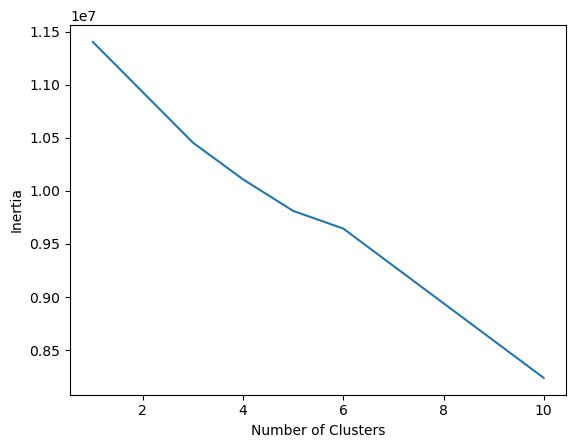

In [8]:
# Utiliser la méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [9]:
# On observe une interia vers 1 pour une valeur de 4 cluster
n_clusters = 4

In [10]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Effectuer le clustering à l'aide de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

# Tree

On part du consta que si le passien est en Severity_Severe on va lui dire d'aller au urgence

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
# Charger les données à partir d'un fichier CSV
data = pd.read_csv('./Cleaned-Data 1.csv')
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [24]:
columns = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton',
           'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
           'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 
           'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', "Country"]
X = data[columns]
y = data['Severity_Severe']

# Encoder les variables catégorielles (genre, gravité, etc.)
X = pd.get_dummies(X)


# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


# Construire le modèle d'arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7550505050505051


In [28]:
X_test.size

506880

In [14]:

# Obtenir les poids de chaque variable dans l'arbre de décision
feature_importances = clf.feature_importances_

# Afficher les poids de chaque variable
for i in range(len(X.columns)):
    print(X.columns[i], ": ", feature_importances[i])

Fever :  0.020665569721785657
Tiredness :  0.041513872090555994
Dry-Cough :  0.0562272422090947
Difficulty-in-Breathing :  0.0748486170790605
Sore-Throat :  0.05037121971389149
None_Sympton :  0.012981394899340677
Pains :  0.06951038040061144
Nasal-Congestion :  0.07297236659616946
Runny-Nose :  0.05563409891144666
Diarrhea :  0.047433562973388944
None_Experiencing :  0.00919245538155313
Age_0-9 :  8.56211876232987e-05
Age_10-19 :  0.0341962026712766
Age_20-24 :  0.035753364050868514
Age_25-59 :  0.020826992639594415
Age_60+ :  0.03297547065791736
Gender_Female :  0.030512187899149838
Gender_Male :  0.029021115559269874
Gender_Transgender :  0.030707108879998182
Contact_Dont-Know :  0.03386319998247162
Contact_No :  0.03730080038603645
Contact_Yes :  0.007646958390563923
Country_China :  0.015992369197920586
Country_France :  0.02100565691281942
Country_Germany :  0.02498411618730635
Country_Iran :  0.020358882737747393
Country_Italy :  0.016322181619900716
Country_Other :  0.020263975

In [55]:

clf.predict(pd.DataFrame(X.iloc[0]).T)

array([0], dtype=int64)

Fever                         1
Tiredness                     1
Dry-Cough                     1
Difficulty-in-Breathing       1
Sore-Throat                   1
None_Sympton                  0
Pains                         1
Nasal-Congestion              1
Runny-Nose                    1
Diarrhea                      1
None_Experiencing             0
Age_0-9                       1
Age_10-19                     0
Age_20-24                     0
Age_25-59                     0
Age_60+                       0
Gender_Female                 0
Gender_Male                   1
Gender_Transgender            0
Contact_Dont-Know             0
Contact_No                    0
Contact_Yes                   1
Country_China                 1
Country_France                0
Country_Germany               0
Country_Iran                  0
Country_Italy                 0
Country_Other                 0
Country_Other-EUR             0
Country_Republic of Korean    0
Country_Spain                 0
Country_

In [4]:
data = pd.read_csv('./Cleaned-Data 1.csv')
columns = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton',
           'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
           'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender',
           'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', "Country"]

X = data[columns]
y = data['Severity_Severe']

# Encoder les variables catégorielles (genre, gravité, etc.)
X = pd.get_dummies(X, dtype=int)

# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le modèle d'arbre de décision
clf = DecisionTreeClassifier(random_state=42, criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [5]:
filename = "covid_severity_model.pickle"
pickle.dump(clf, open(filename, "wb"))

In [8]:
loaded_model = pickle.load(open(filename, "rb"))

# you can use loaded model to compute predictions
y_predicted = loaded_model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_predicted)

In [10]:
print(accuracy)

0.7257102272727273
